<a href="https://colab.research.google.com/github/zangell44/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



### Data and Imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# utility functions

def print_coefficients(X, model):
  """
  Prints regression model coefficients in a nicer format
  """
  print ('\nRegression Coefficients:')
  for i in range(0, len(model.coef_)):
    print (X.columns[i] + ':', model.coef_[i])

### Regression and Analysis
Let's pick living square feet. Seems reasonable that a bigger living space will cost you more!

In [0]:
# set parameters
features = ['sqft_living']
target = 'price'

# select data
X = df[features]
y = df[target]
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.5,
                                                   random_state=1) # for reproducibility

In [4]:
# regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# print coefficents and intercept
print ('Regression Intercept:', lr.intercept_)
print_coefficients(X_train, lr)


Regression Intercept: -36321.18972843769

Regression Coefficients:
sqft_living: 276.42162511671347


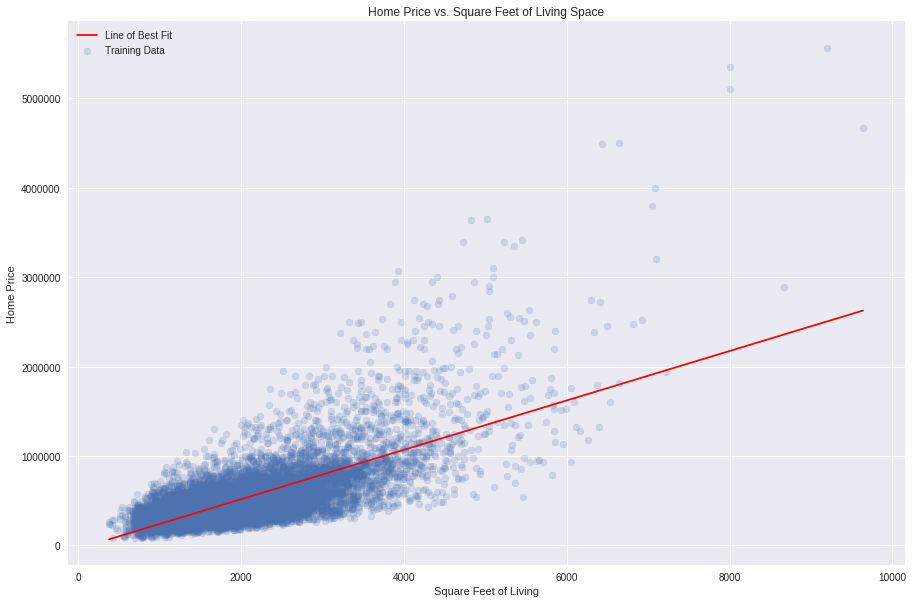

In [9]:
# plot
fig, ax = plt.subplots(figsize=(15,10))

X_plot = np.arange(X_train.min(), X_train.max(), 1)

ax.plot(X_plot, lr.predict(X_plot.reshape(-1,1)), c='red', label='Line of Best Fit')
ax.scatter(x=X_train.iloc[:,0], y=y_train.iloc[:], marker='o', alpha=0.2, label='Training Data')


ax.set_xlabel('Square Feet of Living')
ax.set_ylabel('Home Price')
ax.set_title('Home Price vs. Square Feet of Living Space')
ax.legend()

plt.show()

In [22]:
error reporting
print ('R-Squared for Single Variable Regression:', lr.score(X_test, y_test))
print ('Root Mean Squared Error for Single Variable Regression:', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

R-Squared for Single Variable Regression: 0.49534549070923234
Root Mean Squared Error for Single Variable Regression: 267304.4654163149


### Commentary

Clearly, there is a positive relation between the square feet of living space and the price paid for a home. Specifically, an extra square foot would predict an increase of around ~$267 in home price.

That said, this simple regression only accounts for around 50% of the variation in home price. And, further, our RMSE ($267,304) is too large for the model to be useful.

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

### Regression and Analysis
For this one, let's add the square feet of the lot as a property. It will certainly be related to square feet of living space, but may provide some new info.

In [0]:
# set parameters
features = ['sqft_living', 'sqft_lot']
target = 'price'

# select data
X = df[features]
y = df[target]
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.5,
                                                   random_state=1) # for reproducibility

In [14]:
# regression
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

# print coefficents and intercept
print ('Regression Intercept:', lr.intercept_)
print_coefficients(X_train, lr2)

Regression Intercept: -36321.18972843769

Regression Coefficients:
sqft_living: 277.8951359246989
sqft_lot: -0.19342671508742212


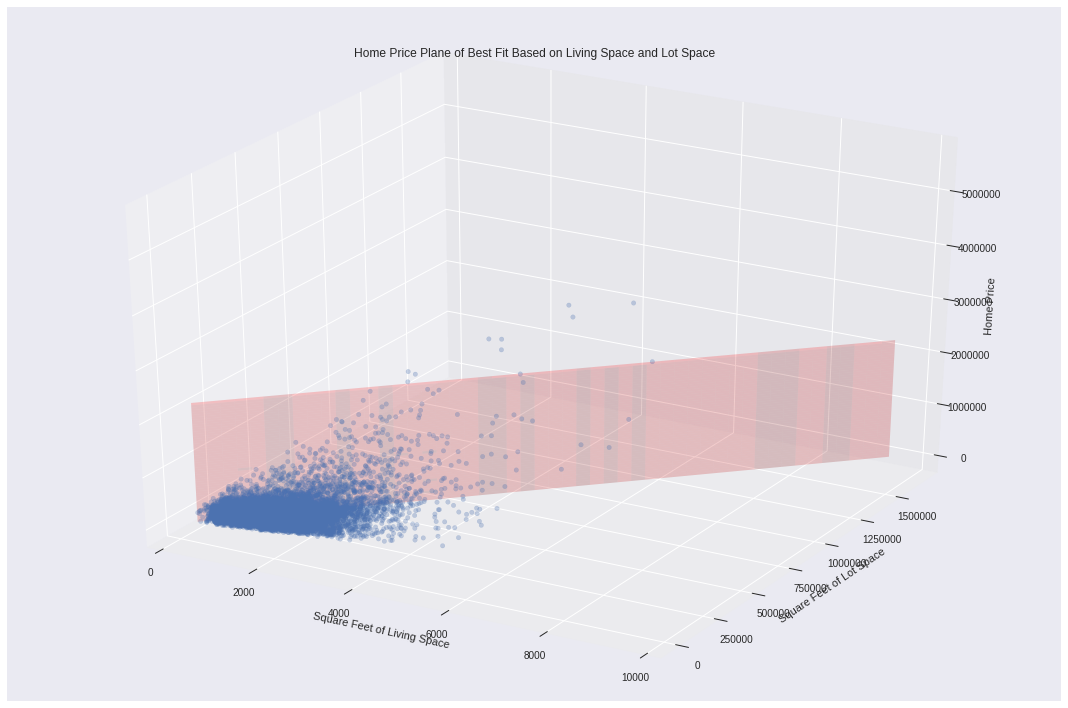

In [46]:
# plotting plane of best fit
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

x1_plot = np.arange(X_train['sqft_living'].min(), X_train['sqft_living'].max(), (X_train['sqft_living'].max()- X_train['sqft_living'].min())/1000)
x2_plot = np.arange(X_train['sqft_lot'].min(), X_train['sqft_lot'].max(), (X_train['sqft_lot'].max()- X_train['sqft_lot'].min())/1000)
y_plot = lr2.predict(np.hstack([x1_plot.reshape(-1,1), x2_plot.reshape(-1,1)]))

ax.plot_surface(X=x1_plot,
                Y=x2_plot,
                Z=y_plot.reshape(-1,1),
                alpha=0.2,
                color='red')

ax.scatter(X_train['sqft_living'],
           X_train['sqft_lot'],
           y_train,
           alpha=0.3)

ax.set_xlabel('Square Feet of Living Space')
ax.set_ylabel('Square Feet of Lot Space')
ax.set_zlabel('Home Price')
ax.set_title('Home Price Plane of Best Fit Based on Living Space and Lot Space')

plt.tight_layout()
plt.show()

In [47]:
# error reporting
print ('R-Squared for Two Variable Regression:', lr2.score(X_test, y_test))
print ('Root Mean Squared Error for Two Variable Regression:', np.sqrt(mean_squared_error(y_test, lr2.predict(X_test))))

R-Squared for Two Variable Regression: 0.4965403770473756
Root Mean Squared Error for Two Variable Regression: 266987.8252847377


### Commentary

It appears that adding lot space to the regression hasn't done much for us. 

R-squared and RMSE remained the same, and the coeffient for living space hasn't changed much. 

The coefficient for lot size is very small in magnitude, and surprisingly, negative. There is likely a data selection issue that would account for this, or perhaps outliers are driving a small negative relationship.

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

### Regression and Analysis
For multiple regression, I'm only going to drop the target variable, and the columns id and date.

The 'id' value certainly should not be predictive of home price. The 'date' may be predictive due to time trends, or when combined with other features (e.g. how many years between when a home was renovated and when it was sold?). However,  I'm going to stop short of that for now.

In [0]:
# set parameters
target = 'price'

# select data
X = df.drop(['price', 'id', 'date'], axis=1) # just going to drop the target, id, and date
y = df[target]
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.5,
                                                   random_state=1) # for reproducibility

In [49]:
# regression
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)

# print coefficents and intercept
print ('Regression Intercept:', lr_all.intercept_)
print_coefficients(X_train, lr_all)

Regression Intercept: 9863102.070596706

Regression Coefficients:
bedrooms: -32642.90014372713
bathrooms: 40118.71006449417
sqft_living: 107.74499238667813
sqft_lot: 0.09156978190968272
floors: 6966.76246596171
waterfront: 559414.7059949018
view: 49772.17719945937
condition: 24881.188874445925
grade: 98177.7373238114
sqft_above: 68.76359701569028
sqft_basement: 38.98139463736963
yr_built: -2631.456358785575
yr_renovated: 19.940040176712177
zipcode: -597.6013931109117
lat: 612696.3509709983
long: -197230.95102920212
sqft_living15: 17.068847266608795
sqft_lot15: -0.2550797443054762


In [50]:
# error reporting
print ('R-Squared for All Variable Regression:', lr_all.score(X_test, y_test))
print ('Root Mean Squared Error for All Variable Regression:', np.sqrt(mean_squared_error(y_test, lr_all.predict(X_test))))

R-Squared for All Variable Regression: 0.6981622762525541
Root Mean Squared Error for All Variable Regression: 206726.37692853593


### Commentary

We still have a fairly low R-squared and a high MSE for the data, considering we've used all the variables.

If I took the time to OHE the categorical variables and engineer other features, I assume we could get closer than this.

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
